# Analyse Statistique Dataset

---
- Justification lignes supprimées
- Top 20 mots
- description nombre de mot, nombre de token
- Nombre de classes moyenne
- Distribution des classes
---

## Import data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barre de progression pour Jupyter
pd.set_option('display.max_colwidth', None)
from IPython.display import display, Markdown

import nltk
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import re




In [2]:
df = pd.read_pickle('data/df_target_V2')
df_metadata = pd.read_parquet('data/df_metadata')

In [3]:
import os
import s3fs
os.environ["AWS_ACCESS_KEY_ID"] = 'PG1XLIX2BY3P3BRECRJQ'
os.environ["AWS_SECRET_ACCESS_KEY"] = '+Mf8EF6sSat8xMorwl1BZLZZBF+Hcj2UHJ4DRZrs'
os.environ["AWS_SESSION_TOKEN"] = 'eyJhbGciOiJIUzUxMiIsInR5cCI6IkpXVCJ9.eyJhY2Nlc3NLZXkiOiJQRzFYTElYMkJZM1AzQlJFQ1JKUSIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sImF1ZCI6WyJtaW5pby1kYXRhbm9kZSIsIm9ueXhpYSIsImFjY291bnQiXSwiYXV0aF90aW1lIjoxNzQzMDcwMzAzLCJhenAiOiJvbnl4aWEiLCJlbWFpbCI6InF1ZW50aW4ubWFycmV0QGVuc2FlLmZyIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImV4cCI6MTc0NDYyMzI1NCwiZmFtaWx5X25hbWUiOiJNYXJyZXQiLCJnaXZlbl9uYW1lIjoiUXVlbnRpbiIsImdyb3VwcyI6WyJVU0VSX09OWVhJQSJdLCJpYXQiOjE3NDQwMTg0NTQsImlzcyI6Imh0dHBzOi8vYXV0aC5sYWIuc3NwY2xvdWQuZnIvYXV0aC9yZWFsbXMvc3NwY2xvdWQiLCJqdGkiOiIzMTQ4NDAyMi1jMTNmLTQ5MGEtYjU4My0yMmQ2MzQ5YTk0MDkiLCJsb2NhbGUiOiJmciIsIm5hbWUiOiJRdWVudGluIE1hcnJldCIsInBvbGljeSI6InN0c29ubHkiLCJwcmVmZXJyZWRfdXNlcm5hbWUiOiJxdWVudGluMTk5OSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1zc3BjbG91ZCJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLXNzcGNsb3VkIl0sInNjb3BlIjoib3BlbmlkIHByb2ZpbGUgZ3JvdXBzIGVtYWlsIiwic2lkIjoiZjMwM2Q3OTYtYTM3My00MTk4LWFmZDktNWUyOTRjMWJkZTliIiwic3ViIjoiOGM1NjkxMjYtMGI2Mi00MGI0LTg4ZDAtMWFhYzgyMTJiOGE5IiwidHlwIjoiQmVhcmVyIn0.cO3MC8ZtjXLoAuYJzNi1BvPaTGQWRyMkyHT3Aakd8S6e0PvkeArmoRyzbeKOyb-amkhwkL5JNfxHsIl_t9aESw'
os.environ["AWS_DEFAULT_REGION"] = 'us-east-1'
fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://'+'minio.lab.sspcloud.fr'},
    key = os.environ["AWS_ACCESS_KEY_ID"], 
    secret = os.environ["AWS_SECRET_ACCESS_KEY"], 
    token = os.environ["AWS_SESSION_TOKEN"])

In [4]:
print(repr(os.getenv("AWS_ACCESS_KEY_ID")))
print(repr(os.getenv("AWS_SECRET_ACCESS_KEY")))

'PG1XLIX2BY3P3BRECRJQ'
'+Mf8EF6sSat8xMorwl1BZLZZBF+Hcj2UHJ4DRZrs'


raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_final"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df.to_csv(file_out)

raise RuntimeError("⛔ Cette cellule ne doit pas être exécutée.")

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_metadata"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df_metadata.to_csv(file_out)

## Selection des cas cliniques


In [5]:
df = pd.read_pickle('data/df_target_V2')

In [6]:
df.shape

(10718, 12)

In [7]:
# On convertit chaque élément en array bool explicite
target_array = np.vstack(df['target'].apply(lambda x: np.array(x, dtype=bool)))

In [8]:
MeSH_vides = df[df['target'].apply(lambda x: not any(x))]
print("nombre cas sans code MeSH catégorie 'disease' :", MeSH_vides.shape)

df = df.drop(MeSH_vides.index)

nombre cas sans code MeSH catégorie 'disease' : (667, 12)


In [9]:
keys = [f"C{str(i).zfill(2)}" for i in range(1, 27)]
values = target_array.sum(axis=0)
result = dict(zip(keys, values))

cas_par_classes = pd.DataFrame.from_dict(result, orient='index', columns=['nombre_cas'])
cas_par_classes

,nombre_cas
C01,2343
C02,0
C03,0
C04,2998
C05,1008
C06,1519
C07,392
C08,1567
C09,261
C10,2136


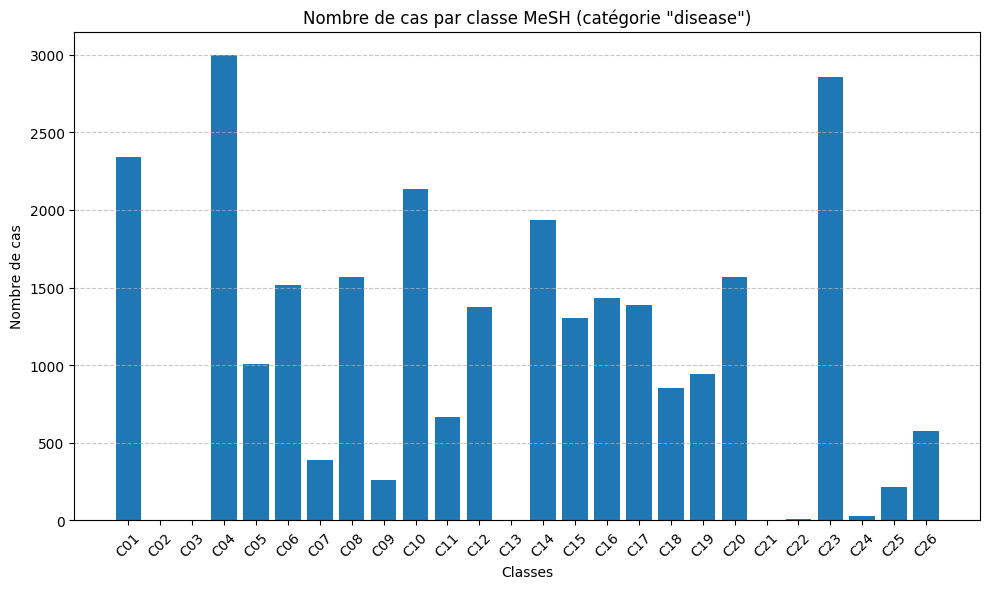

In [10]:
# Tracer un barplot
plt.figure(figsize=(10, 6))
plt.bar(cas_par_classes.index, cas_par_classes['nombre_cas'])
plt.xlabel('Classes')
plt.ylabel('Nombre de cas')
plt.title('Nombre de cas par classe MeSH (catégorie "disease")')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Matrice de corrélation entre les classes

In [11]:
import numpy as np
import pandas as pd

# 1. Ton array de base
arr_int = target_array.astype(int)

# 2. Générer TOUS les noms d'origine
full_category_names = [f"C{str(i+1).zfill(2)}" for i in range(arr_int.shape[1])]

# 3. Détecter colonnes non constantes
non_constant_columns = arr_int.std(axis=0) != 0

# 4. Réduire arr_int en gardant trace
arr_int = arr_int[:, non_constant_columns]

# 5. Garder uniquement les catégories non constantes
category_names = [name for name, keep in zip(full_category_names, non_constant_columns) if keep]

# 6. Calcul de la corrélation
correlation_matrix = np.corrcoef(arr_int, rowvar=False)

# 7. Masquer le triangle inférieur
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = np.where(mask, np.nan, correlation_matrix)

# 8. Créer un DataFrame avec les noms corrects
correlation_df = pd.DataFrame(correlation_matrix, index=category_names, columns=category_names)

# 9. Fonction de stylisation
def style_corr(val):
    if pd.isna(val):
        return ""
    style = ""
    if abs(val) > 0.10:
        style += "font-weight: bold;"
    return style

# 10. Appliquer le style
styled_corr = (
    correlation_df.style
    .format(precision=2, na_rep="")  # 2 chiffres
    .background_gradient(cmap='RdYlGn', vmin=-1, vmax=1)  # couleurs
    .applymap(style_corr)  # gras si |corr| > 0.10
    .set_properties(**{'font-size': '10pt'})  # taille police
    .set_caption("Matrice de corrélation (triangle supérieur) entre classes MeSH C01 à C26")
)

# 11. Afficher
styled_corr

/tmp/ipykernel_9132/976907673.py:43: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_corr)  # gras si |corr| > 0.10


,C01,C04,C05,C06,C07,C08,C09,C10,C11,C12,C14,C15,C16,C17,C18,C19,C20,C22,C23,C24,C25,C26
C01,,-0.19,-0.05,-0.00,-0.02,0.27,0.01,-0.06,-0.02,0.03,-0.09,-0.01,-0.14,-0.00,-0.09,-0.09,0.05,0.05,-0.02,-0.01,-0.01,-0.08
C04,,,0.00,0.15,0.06,0.01,0.04,-0.05,-0.06,0.07,-0.13,0.16,-0.12,0.03,-0.08,0.17,0.08,-0.02,-0.12,-0.02,-0.07,-0.11
C05,,,,-0.08,0.12,-0.05,0.03,0.06,0.01,-0.05,-0.06,-0.04,0.12,0.08,0.06,0.01,0.01,-0.01,-0.04,-0.00,-0.03,0.05
C06,,,,,-0.03,-0.08,-0.01,-0.15,-0.09,-0.04,-0.10,-0.02,-0.02,-0.06,0.01,0.03,-0.04,0.03,0.07,-0.01,0.00,-0.03
C07,,,,,,-0.03,0.18,-0.02,0.09,-0.03,-0.02,-0.02,0.03,0.10,-0.03,-0.05,0.02,-0.00,-0.02,-0.00,0.05,-0.03
C08,,,,,,,0.14,-0.09,-0.06,-0.07,-0.02,-0.01,-0.06,-0.05,-0.06,-0.04,0.01,-0.01,-0.02,0.06,-0.02,-0.04
C09,,,,,,,,0.07,0.01,-0.03,-0.01,-0.01,0.01,-0.01,-0.02,-0.02,-0.02,-0.00,0.05,0.00,-0.02,-0.01
C10,,,,,,,,,0.12,-0.09,0.03,-0.08,0.09,-0.06,0.06,0.03,0.02,-0.00,0.13,-0.01,-0.01,0.08
C11,,,,,,,,,,-0.07,-0.01,-0.04,0.08,0.05,-0.01,-0.03,0.03,0.02,0.01,0.00,-0.02,-0.00
C12,,,,,,,,,,,-0.07,-0.02,-0.00,-0.04,0.02,0.12,0.06,-0.01,0.02,-0.01,-0.02,-0.05


#### Brouillon


    # Convertir en int
    arr_int = target_array.astype(int)

    # Supprimer les colonnes constantes (écart-type nul)
    #arr_int = arr_int[:, arr_int.std(axis=0) != 0]

    # Calculer la corrélation
    correlation_matrix = np.corrcoef(arr_int, rowvar=False)

    # Masquer le triangle inférieur
    mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
    correlation_matrix = np.where(mask, np.nan, correlation_matrix)

    # Créer un DataFrame
    correlation_df = pd.DataFrame(correlation_matrix)

    # Appliquer un style : format 2 chiffres, couleurs selon valeur
    styled_corr = correlation_df.style \
        .format(precision=2, na_rep="") \
        .background_gradient(cmap='RdYlGn', vmin=-1, vmax=1) \
        .set_properties(**{'font-size': '10pt'}) \
        .set_caption("Matrice de corrélation (triangle supérieur seulement)")

    # Afficher dans Jupyter
    styled_corr


In [12]:
#pip install tabulate

    # 1. Convertir en int
    arr_int = target_array.astype(int)

    # 2. Calculer la matrice de corrélation
    correlation_matrix = np.corrcoef(arr_int, rowvar=False)

    # 3. Masquer le triangle inférieur
    mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
    correlation_matrix_masked = np.where(mask, np.nan, correlation_matrix)

    # 4. Mettre dans un DataFrame
    correlation_df = pd.DataFrame(correlation_matrix_masked)

    # 5. Fonction de formatage
    def highlight_corr(val):
        if np.isnan(val):
            return ""  # ne rien afficher pour les NaN
        val_rounded = f"{val:.2f}"
        if abs(val) > 0.10:
            return f"**{val_rounded}**"  # mettre en gras
        else:
            return val_rounded

    # 6. Appliquer le formatage
    formatted_corr_df = correlation_df.applymap(highlight_corr)

    # 7. Afficher joliment en markdown
    md_table = formatted_corr_df.to_markdown(index=False)
    display(Markdown(md_table))

## Analyse case_text

In [13]:
df['case_text'].str.len().describe()

count    10051.000000
mean      3502.605114
std       2399.441600
min        145.000000
25%       2004.500000
50%       3012.000000
75%       4343.000000
max      60512.000000
Name: case_text, dtype: float64

### Nuage de mots ordinaires

In [ ]:

from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
text_brut = " ".join(df['case_text'].astype(str))
STOPWORDS = set(stopwords.words('english'))

# Nettoyer et découper en mots
words = re.findall(r'\b\w+\b', text_brut.lower())
words = [word for word in words if word not in STOPWORDS and len(word) > 2]

# Compte les occurrences des mots
term_counts = Counter(words)

# Prend les 20 mots les plus fréquents
most_common_terms = term_counts.most_common(20)

# Affiche proprement en texte
print("Top 20 des mots les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des mots les plus fréquents :
patient: 42208
showed: 21150
figure: 19926
normal: 17939
revealed: 16054
left: 15717
right: 15197
day: 14040
blood: 13655
examination: 12687
treatment: 11966
year: 11738
performed: 10850
old: 10724
fig: 10646
history: 10253
months: 10033
cells: 9616
days: 8983
also: 8185


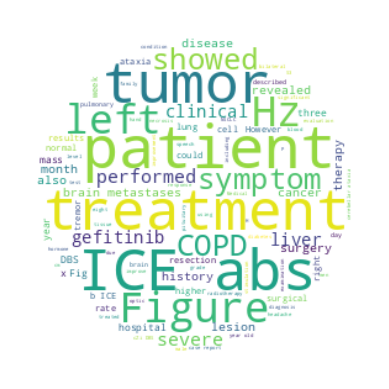

In [ ]:
# Display one wordcloud for each of the most frequent classes
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# plot a word cloud
text = str(df['case_text'])
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

### Nuage de mots médicaux

In [ ]:
import spacy
import scispacy
from scispacy.linking import EntityLinker
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the Med7 model
nlp = spacy.load("en_core_sci_sm")

# Ajouter un linker vers UMLS (si tu veux mapper les entités à des concepts médicaux précis)
linker = EntityLinker(resolve_abbreviations=True, name="umls")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.1.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.1.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Échantillon aléatoire de 250 lignes (modifiable)
sample_df = df.sample(n=250, random_state=42)
text = " ".join(sample_df['case_text'].astype(str))

# Applique le modèle NLP sur tout le texte d’un coup (plus rapide et propre)
doc = nlp(text)

# Récupère les entités détectées
medical_terms = [ent.lemma_.lower() for ent in doc.ents]

# Ajoute des mots personnalisés si besoin
additional_terms = ["one", "two", "three", "day", "daily", "month"]
medical_terms.extend(additional_terms)

In [ ]:
from collections import Counter

# Compte les occurrences des termes médicaux
term_counts = Counter(medical_terms)

# Affiche les 20 termes les plus fréquents
most_common_terms = term_counts.most_common(40)

# Affichage propre
print("Top 20 des termes médicaux les plus fréquents :")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 20 des termes médicaux les plus fréquents :
patient: 1018
day: 342
month: 319
year: 193
treatment: 177
level: 158
week: 155
negative: 145
increase: 138
lesion: 137
case: 135
figure: 128
positive: 125
diagnosis: 119
patient's: 112
finding: 97
admission: 94
symptom: 93
surgery: 92
hospital: 88
decrease: 88
study: 85
physical examination: 85
age: 85
detect: 83
examination: 82
diagnose: 79
tumor: 77
follow-up: 75
result: 66
male: 65
mass: 65
size: 64
datum: 64
severe: 63
history: 63
elevated: 63
bilateral: 61
mri: 60
female: 60


['japanese', 'woman', 'haze', 'left eye', 'hospital', 'exacerbation', 'bitemporal hemianopia', 'family', 'medical history', 'computed tomography', 'head', 'calcified mass', 'sella turcica', 'magnetic resonance imaging', 'mri', 'brain', 'mass protruding', 'sella turcica', 'pituitary gland', 'upper right', 'optic chiasm', 'upper left', 'figure 1a', 'b', 'transsphenoidal surgery', 'resection', 'pathological diagnosis', 'malignant tumor', 'differential diagnosis', 'solitary fibrous tumor', 'sft', 'mcs', 'month', 'mri', 'tumor recurrence', 'relapsed', 'tumor', 'resect', 'craniotomy', 'patient', 'stereotactic radiotherapy', 'srt', 'year', 'srt', 'surgical resection', 'srt', 'local recurrence', 'histologically', 'tumor', 'small round cell', 'hyaline', 'cartilage', 'atypical', 'chondroid cell', 'float', 'lacunar space', 'cellularity', 'atypical', 'chondroid cell', 'ossification', 'calcification', 'cartilaginous area', 'place', 'small cell', 'spindle-shaped', 'morphology', 'hemangiopericytomato

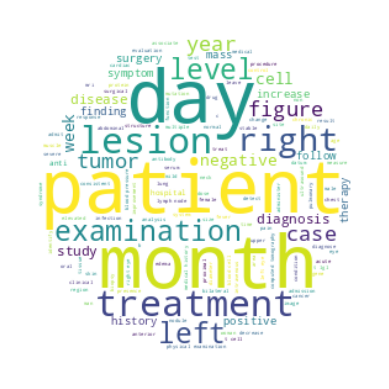

In [ ]:
# Génère le nuage de mots
medical_bagofwords = " ".join(medical_terms)
print(medical_terms)

wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords=STOPWORDS)
wc.generate(medical_bagofwords)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()